In [253]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reddit-data-for-factors-influencing-startup/Reddit Data.csv


# **Import**
----------

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

# **1. Data Import**
--------------

In [255]:
df = pd.read_csv('/kaggle/input/reddit-data-for-factors-influencing-startup/Reddit Data.csv')

### **Data Description**
------------------
* **The dataset I will be collecting consists of posts from relevant subreddits. To ensure relevance, I will use both keyword searches ("successful startup factors") and regex patterns to filter posts containing phrases.**
* https://www.kaggle.com/datasets/ishikaaaaaathakur/reddit-data-for-factors-influencing-startup

## **Summary**

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    567 non-null    object
 1   Body     567 non-null    object
 2   Upvotes  567 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 13.4+ KB


In [257]:
df.head()

,Title,Body,Upvotes
0,7 Inspiring Micro-Startup Success Stories to F...,"In this article, we embark on a fascinating jo...",5
1,7 Inspiring Micro-Startup Success Stories to F...,"In this article, we embark on a fascinating jo...",1
2,"I went from art-school dropout to 12k/month, b...","Hey there! so like it says in the title, I dro...",403
3,What are the key factors a successful entrepre...,Hi reddit. I am working on what I need to do t...,2
4,15 lessons from our first $15 million in recur...,"Hey Reddit,\n\nI wrote this post for my blog, ...",900


In [258]:
df.tail()

,Title,Body,Upvotes
562,Traction is no longer king. Having the right t...,"This applies for any founder, but is particula...",196
563,How This Letter Made $2 Billion Dollars for Th...,"It's 1975.\n\nA copywriter, Martin Conroy, sit...",1061
564,YC startup: Our app was so bad it went viral,I’m one of the cofounders of [Superpowered](ht...,351
565,"Some ""lessons"" from someone who's sold $10m on...","Hi there, I am about 7 years into my entrepren...",494
566,I’m SICK of all these “Success Stories” Online,"In 2023, everyone is a millionaire.\n\nEvery s...",162


## **Missing Value & Duplicate Value Check**

In [259]:
pd.DataFrame(df.isna().sum().reset_index(name='Na Count'))

,index,Na Count
0,Title,0
1,Body,0
2,Upvotes,0


In [260]:
df.duplicated().sum()

0

# **2. Data Transform**

### **Data Cleaning**

In [261]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'.∗?.*?', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    
    return text

df['cleaned_Title'] = df['Title'].apply(lambda x: preprocess_text(x))
df['cleaned_Body'] = df['Body'].apply(lambda x: preprocess_text(x))

df['cleaned_Title'] = df['cleaned_Title'].astype(str)
df['cleaned_Body'] = df['cleaned_Body'].astype(str)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [262]:
def Categorization(upvotes):
    if upvotes < 100:
        return "Low"
    elif upvotes < 1000:
        return "Medium"
    else:
        return "High"

df['Upvotes'] = df['Upvotes'].apply(lambda x: Categorization(x))

# **3. Data Visualization**

## **Histogram**

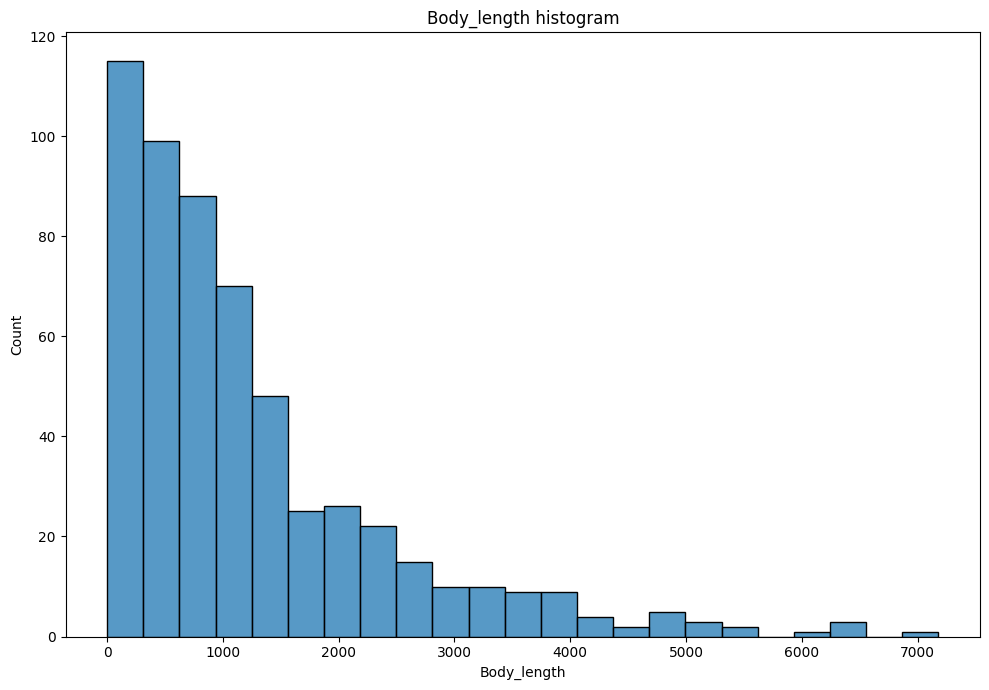

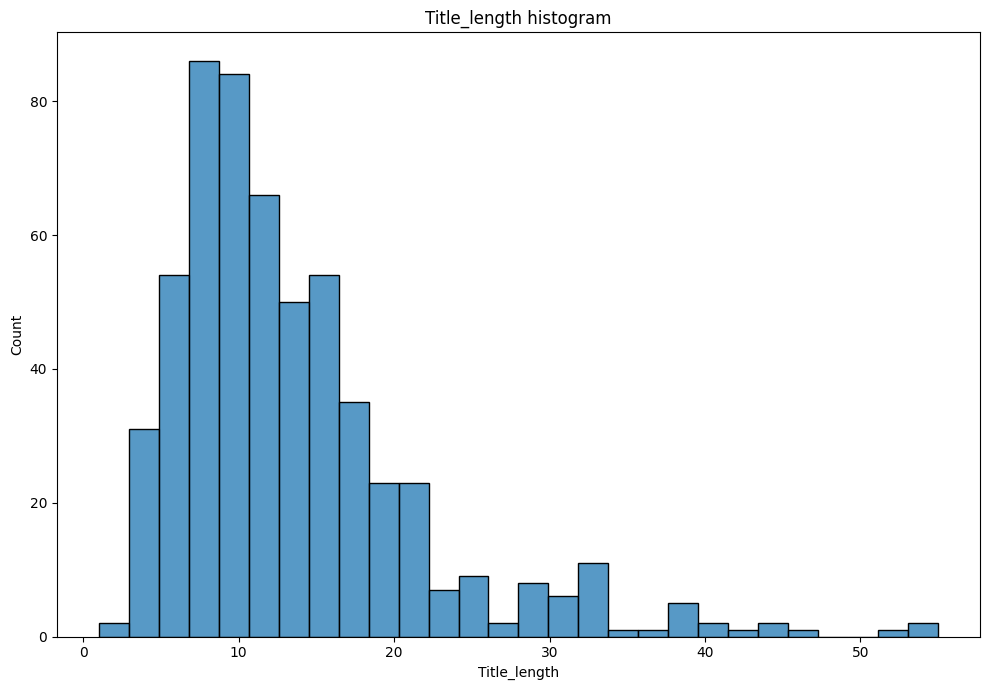

In [263]:
#Text Length 
df['Title_length'] = df['Title'].apply(lambda x: len(str(x).split()))
df['Body_length'] = df['Body'].apply(lambda x: len(str(x).split()))

plt.subplots(figsize= (10,7))
sns.histplot(df, x= 'Body_length')
plt.title('Body_length histogram')
plt.tight_layout()
plt.show() 

plt.subplots(figsize= (10,7))
sns.histplot(df, x= 'Title_length' )
plt.title('Title_length histogram')
plt.tight_layout()
plt.show() 

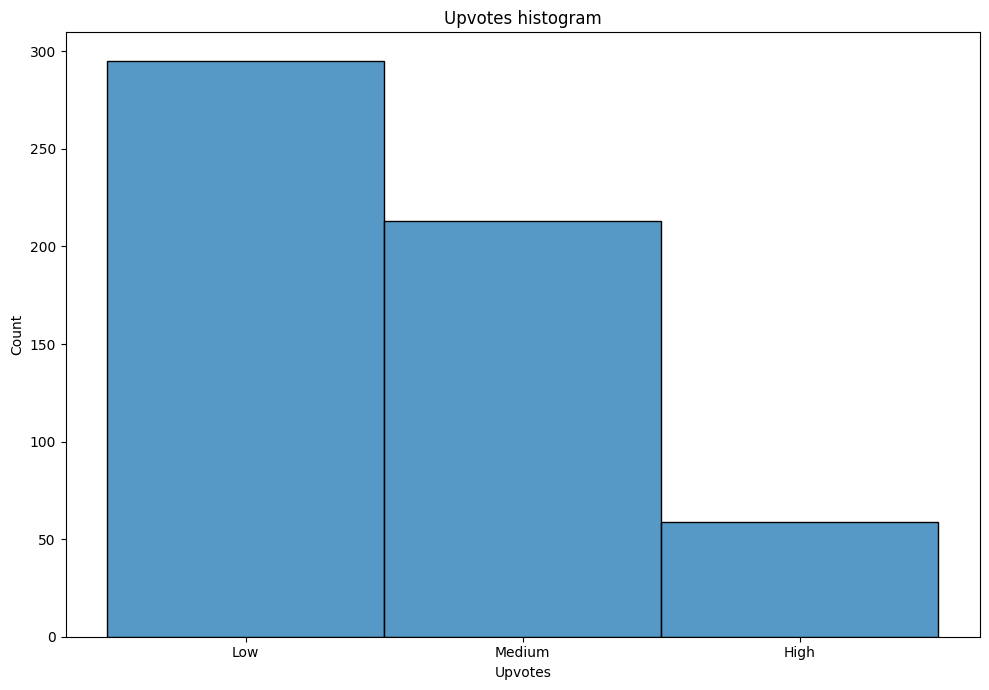

In [264]:
plt.subplots(figsize=(10, 7))
sns.histplot(df, x= 'Upvotes' )
plt.title('Upvotes histogram')
plt.tight_layout()
plt.show() 

## **WordCloud**

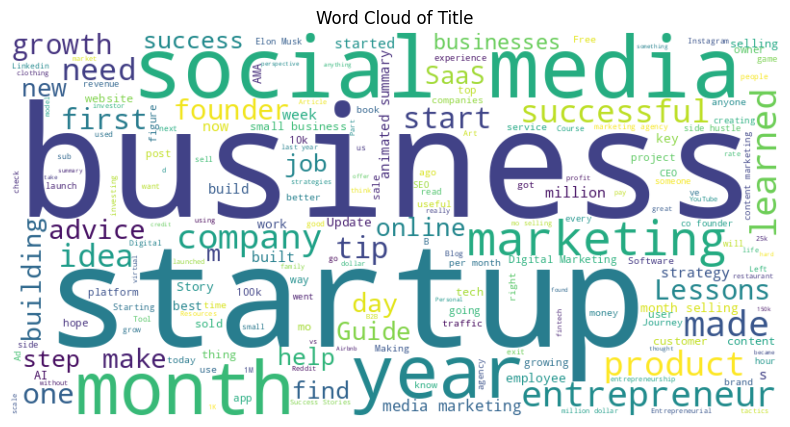

In [265]:
# Cleaned Title Word Cloud
Title_text = ' '.join(df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Title_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title')
plt.show()

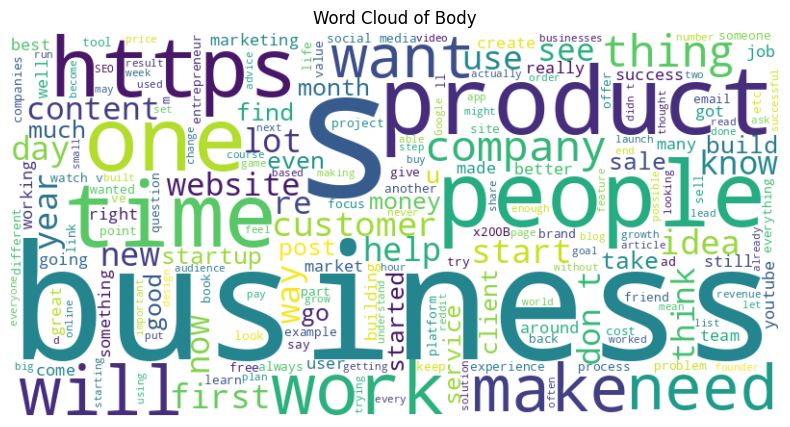

In [266]:
# Cleaned Body Word Cloud
body_text = ' '.join(df['Body'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Body')
plt.show()

## **Word Frequency**

In [267]:
def preprocess_text2(text):
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    tokens = text.lower().split()     # lowercase and split into words
    stopwords = set(['the', 'a', 'and', 'is', 'to', 'in'])
    return [word for word in tokens if word not in stopwords]

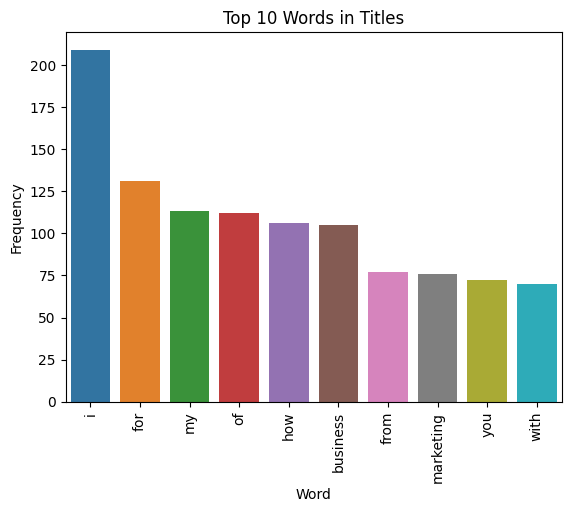

In [268]:
# get word frequencies for titles
all_words = df['Title'].dropna().apply(preprocess_text2).sum()
word_counts = Counter(all_words).most_common(10)

# create a DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'frequency'])

# plot the top 10 most common words
sns.barplot(word_freq_df, x='word', y='frequency')
plt.title('Top 10 Words in Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

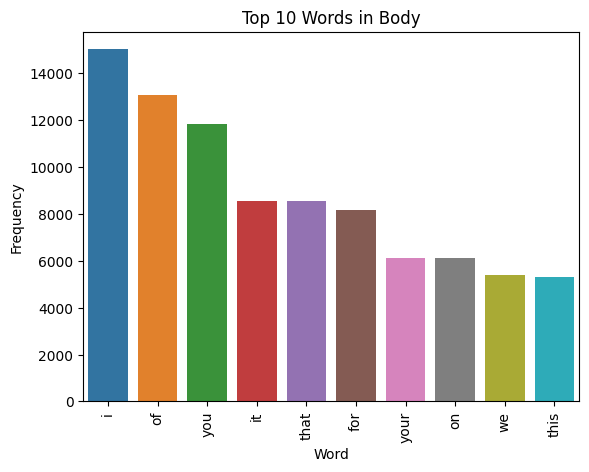

In [269]:
# get word frequencies for Body
all_words = df['Body'].dropna().apply(preprocess_text2).sum()
word_counts = Counter(all_words).most_common(10)

# create a DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'frequency'])

# plot the top 10 most common words
sns.barplot(data=word_freq_df, x='word', y='frequency')
plt.title('Top 10 Words in Body')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## **TF-IDF**

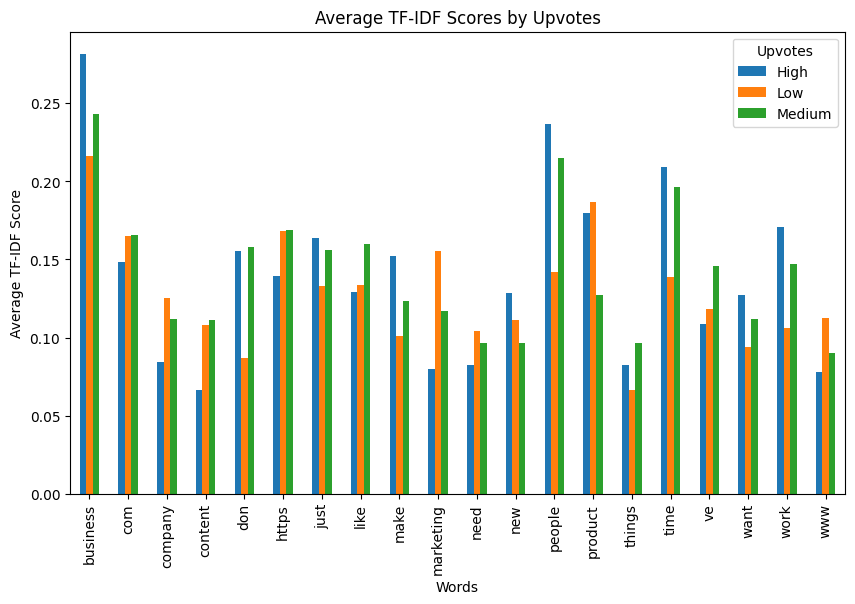

In [270]:
# vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # limit to 20 words for clarity
tfidf_matrix = tfidf.fit_transform(df['Body'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# add label to the TF-IDF DataFrame
tfidf_df['Upvotes'] = df['Upvotes']

# plot average TF-IDF scores by label for the top words
tfidf_avg = tfidf_df.groupby('Upvotes').mean().T
tfidf_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average TF-IDF Scores by Upvotes')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Words')
plt.show()

* **The bar chart shows the average TF-IDF scores of selected words across upvotes labels in the dataset.**
* **TF-IDF scores help highlight terms that may be more informative or unique to each label.**

# **4. Modeling**

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [272]:
texts  = df['Body']
labels  = df['Upvotes']

In [273]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

## **Train Test Split**

In [274]:
X_train, X_test, y_train, y_test = train_test_split(texts, encoded_labels, test_size=0.2, random_state=42, stratify = encoded_labels)

In [275]:
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## **ML Modeling**

In [276]:
rfc = RandomForestClassifier(n_estimators = 300 , random_state=42)
lgr = LogisticRegression()
xgb = XGBClassifier(random_state=42)

models = [rfc, lgr, xgb]

names = ["Random Forest", "Logistic Regression", "XGBoost"]

Random Forest accuracy: 0.614
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        12
         Low       0.65      0.80      0.72        59
      Medium       0.55      0.53      0.54        43

    accuracy                           0.61       114
   macro avg       0.40      0.44      0.42       114
weighted avg       0.54      0.61      0.58       114



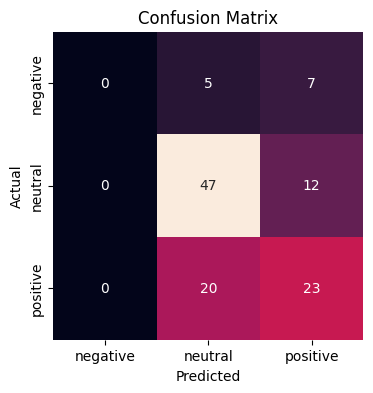

--------------------------------------------------
Logistic Regression accuracy: 0.5965
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        12
         Low       0.62      0.85      0.71        59
      Medium       0.55      0.42      0.47        43

    accuracy                           0.60       114
   macro avg       0.39      0.42      0.40       114
weighted avg       0.53      0.60      0.55       114



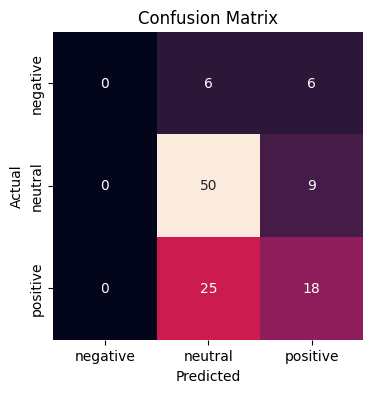

--------------------------------------------------
XGBoost accuracy: 0.6667
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        12
         Low       0.72      0.86      0.78        59
      Medium       0.60      0.58      0.59        43

    accuracy                           0.67       114
   macro avg       0.44      0.48      0.46       114
weighted avg       0.60      0.67      0.63       114



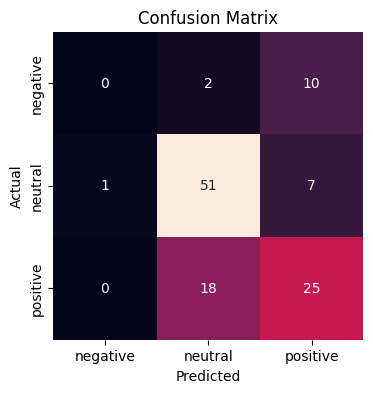

--------------------------------------------------


In [277]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(X_train_tfidf, y_train)
    pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, pred)
    
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    print(f'{names[index]} accuracy: {round(accuracy,4)}')
    print(classification_report(y_test, pred, target_names=label_encoder.classes_))
 
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xticks([0.5, 1.5, 2.5], labels=['negative','neutral', 'positive'])
    plt.yticks([0.5, 1.5, 2.5], labels=['negative','neutral', 'positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    
    index += 1

## **Model Comparison**

In [278]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,61.403509
1,Logistic Regression,59.649123
2,XGBoost,66.666667


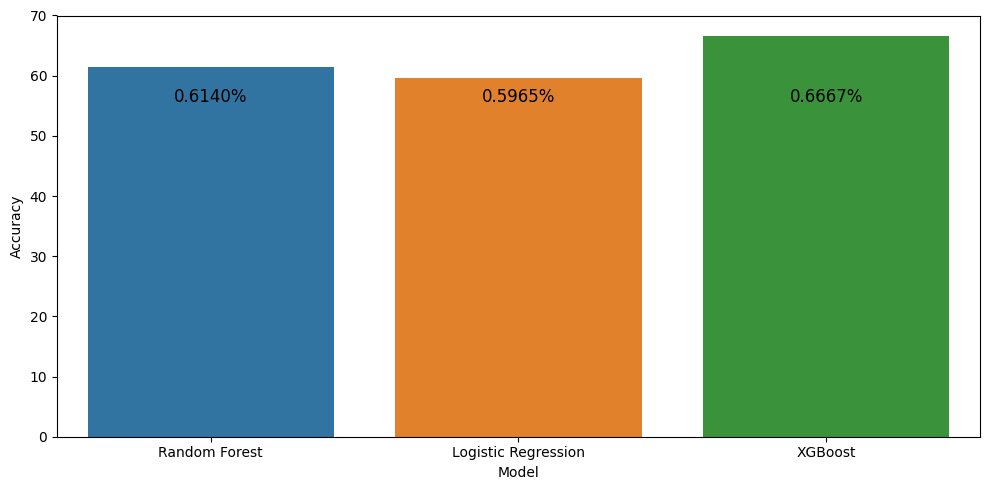

In [279]:
plt.subplots(figsize=(10,5))
sns.barplot(acc_df, x= 'Model', y = 'Accuracy')

for index, value in enumerate(ac):
    plt.text(index, value + 55, f"{value:.4f}%", ha='center', fontsize=12)
    
plt.tight_layout()
plt.show() 


* **The accuracy of all models is similar.** 
* **XGBoost Model is Best Model**


-------------------
**Thankyou. Please leave your advice in the comments.**